<h2>1. Importing Libraries</h2>


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import datetime

<h2>2. Loading Datas and Preprocessing</h2>

In [0]:
# Loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Getting data dimensions
n_rows, n_cols, n_channels = x_train.shape[1], x_train.shape[2], 1
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], n_rows, n_cols, n_channels)
x_test = x_test.reshape(x_test.shape[0], n_rows, n_cols, n_channels)

x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_validation, y_train, y_validation = train_test_split(x_train, 
                                                                y_train, 
                                                                test_size=0.2, 
                                                                shuffle=True, 
                                                                stratify=y_train)

print('Images shape:', x_train.shape)
print('# Train samples:', x_train.shape[0])
print('# Test samples:', x_test.shape[0])

Images shape: (48000, 28, 28, 1)
# Train samples: 48000
# Test samples: 10000


<h2>3. Model Settings</h2>

<h3>3.1 Setting parameters</h3>

In [0]:
# Setting model's parameters
batch_size = 128
epochs = 30
adam = optimizers.Adam(lr=0.0005, 
                       beta_1=0.9, 
                       beta_2=0.999, 
                       epsilon=None, 
                       decay=0.0, 
                       amsgrad=False)
loss = keras.losses.categorical_crossentropy

<h3>3.2 Setting the Neural Network</h3>

In [0]:
# Defining the model
def baseline_model():
    model = Sequential()
    
    # ------------------ 1° Layer (Conv) ------------------
    model.add(Conv2D(30, 
                     kernel_size=(3, 3), 
                     activation='relu', 
                     input_shape=(n_rows, n_cols, n_channels)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # ------------------ 2° Layer (Conv) ------------------
    model.add(Conv2D(10, 
                     kernel_size=(3, 3), 
                     activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # ------------------ 3° Layer (FC) ------------------
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss=loss,
                  optimizer=adam,
                  metrics=['accuracy', 'mae'])
    
    return model

<h2>4. Training and Performance</h2>

In [0]:
model = baseline_model()

timerStart = datetime.datetime.now()
result = model.fit(x_train, 
                   y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test, verbose=0)

timerStop = datetime.datetime.now()

# Printing results
print('Mean loss on train set:', round((result.history['loss'])[-1], 3))
print('Mean loss on validation set:', round((result.history['val_loss'])[-1], 3))
print('Mean loss on test set:', round(score[0], 3))
print('Mean accuracy on train set:', round((result.history['acc'])[-1], 3))
print('Mean accuracy on validation set:', round((result.history['val_acc'])[-1], 3))
print('Mean accuracy on test set:', round(score[1], 3))
print("Process ended in: ", (timerStop - timerStart).total_seconds())

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 125us/step - loss: 0.7454 - acc: 0.7838 - mean_absolute_error: 0.0725 - val_loss: 0.2775 - val_acc: 0.9290 - val_mean_absolute_error: 0.0342
Epoch 2/30
48000/48000 [==============================] - 5s 110us/step - loss: 0.1928 - acc: 0.9421 - mean_absolute_error: 0.0202 - val_loss: 0.1773 - val_acc: 0.9544 - val_mean_absolute_error: 0.0217
Epoch 3/30
48000/48000 [==============================] - 5s 109us/step - loss: 0.1428 - acc: 0.9572 - mean_absolute_error: 0.0147 - val_loss: 0.1411 - val_acc: 0.9642 - val_mean_absolute_error: 0.0171
Epoch 4/30
48000/48000 [==============================] - 5s 111us/step - loss: 0.1181 - acc: 0.9639 - mean_absolute_error: 0.0122 - val_loss: 0.1247 - val_acc: 0.9663 - val_mean_absolute_error: 0.0150
Epoch 5/30
48000/48000 [==============================] - 5s 109us/step - loss: 0.1034 - acc: 0.9679 - mean_absolute_error: 0.0106 - val_loss:

<h2>5. Summary</h2>

<h3>5.1 Model Summary</h3>

In [0]:
# Visualizing model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 30)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 10)        2710      
_________________________________________________________________
dropout_16 (Dropout)         (None, 11, 11, 10)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 250)               0         
__________

<h3>5.2 Accuracy and Loss Analysys</h3>

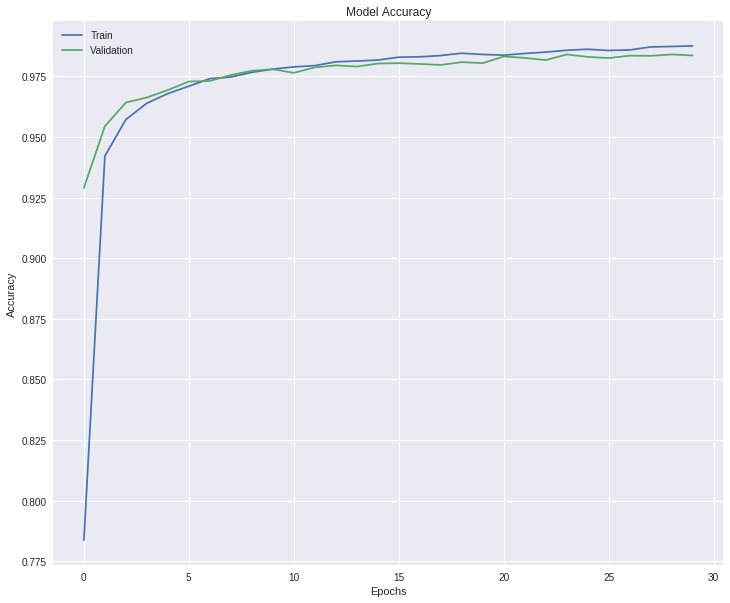

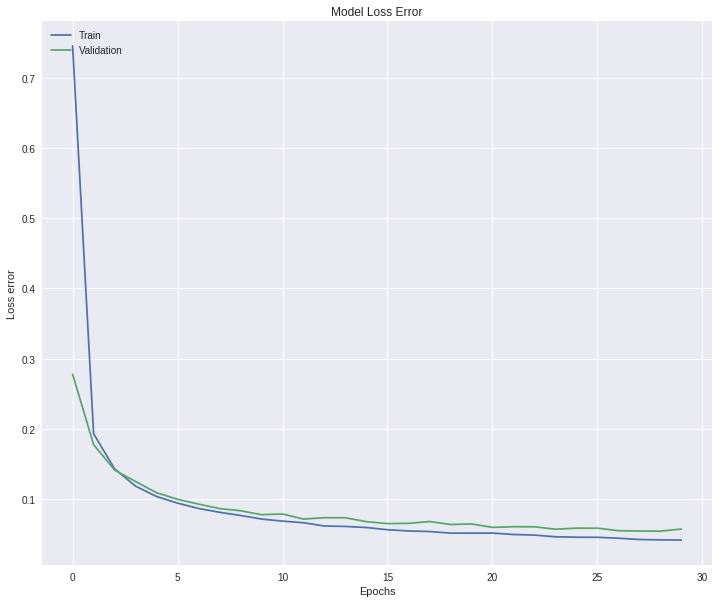

In [0]:
# Setting graph's size
plt.rcParams["figure.figsize"] = [12, 10]

# ------------------------ Accuracy graph ------------------------

# Loading datas
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model Accuracy')

# Setting graph
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
axes = plt.gca()
#axes.set_xlim([0, epochs])
#axes.set_ylim([0, 1])

# Showing graph
plt.show()

# ------------------------ Loss function graph ------------------------

# Loading datas
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss Error')

# Setting graph
plt.ylabel('Loss error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
axes = plt.gca()
#axes.set_xlim([0, epochs])
#axes.set_ylim([0, 1])

# Showing graph
plt.show()